<a href="https://colab.research.google.com/github/kevGamer09-glitch/TAREA-3/blob/main/TEMA_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASIFICACION DE ROPA :V

In [ ]:
# este código prepara el entorno para construir, entrenar y evaluar un modelo de clasificación de imágenes de ropa usando redes neuronales convolucionales en TensorFlow/Keras.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Fashion MNIST Dataset

In [ ]:
#contiene imágenes en escala de grises de 28x28 píxeles de artículos de ropa
fashion_mnist = tf.keras.datasets.fashion_mnist


In [ ]:
#sirve para cargar los datos del conjunto Fashion MNIST
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [ ]:
#Crea una lista llamada class_names que contiene los nombres de las 10 categorías del conjunto de datos Fashion MNIST.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocesamiento de datos

In [ ]:
#Carga el conjunto de datos Fashion MNIST en variables separadas para entrenamiento y prueba.
 (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualización de una imagen

In [ ]:
#Asigna el valor 100 a la variable index
index = 100

In [ ]:
#Seleccionan una imagen y su etiqueta correspondiente del conjunto de entrenamiento usando la variable index
image = train_images[index]
label = train_labels[index]

In [ ]:
#Muestra en la consola los valores de los píxeles de la imagen seleccionada
print(image)

[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   

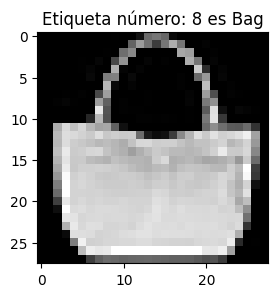

In [ ]:
#Visualiza la imagen seleccionada image de Fashion MNIST junto con su etiqueta correspondiente
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

Preprocesamiento de datos

In [ ]:
#muestran las dimensiones de los conjuntos de datos de entrenamiento y prueba
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
mages = train_images / 255.0
test_images = test_images / 255.0train_i

Red neuronal convolucional

In [ ]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
#Configura el modelo de TensorFlow/Keras antes de entrenarlo, definiendo cómo se ajustarán los pesos, qué función de pérdida se usará y qué métricas se registrarán
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# se ntrena el modelo de red neuronal usando los datos de entrenamiento, durante 10 épocas, y evalúa su rendimiento en los datos de prueba al final de cada época.
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7360 - loss: 0.7067 - val_accuracy: 0.8706 - val_loss: 0.3659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8807 - loss: 0.3271 - val_accuracy: 0.8901 - val_loss: 0.3086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8966 - loss: 0.2827 - val_accuracy: 0.8944 - val_loss: 0.2924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9056 - loss: 0.2526 - val_accuracy: 0.8987 - val_loss: 0.2817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9195 - loss: 0.2187 - val_accuracy: 0.9058 - val_loss: 0.2612
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9259 - loss: 0.1974 - val_accuracy: 0.8999 - val_loss: 0.2767
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9317 - loss: 0.1809 - val_accuracy: 0.9077 - val_loss: 0.2606
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9394 - loss: 0.1650 

Evaluación

In [ ]:
#Evalúa el rendimiento final del modelo usando los datos de prueba (que no se usaron para entrenar
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9061 - loss: 0.2874


Predicciones

In [ ]:
# crea un nuevo modelo llamado probability_model que añade una capa Softmax al final del modelo original
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Calcular la matriz de confusión

In [ ]:
#Calcula la matriz de confusión comparando las etiquetas reales (test_labels) con las etiquetas predichas (predicted_labels)
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

Visualizar la matriz de confusión y mostrar la sensibilidad para cada clasE

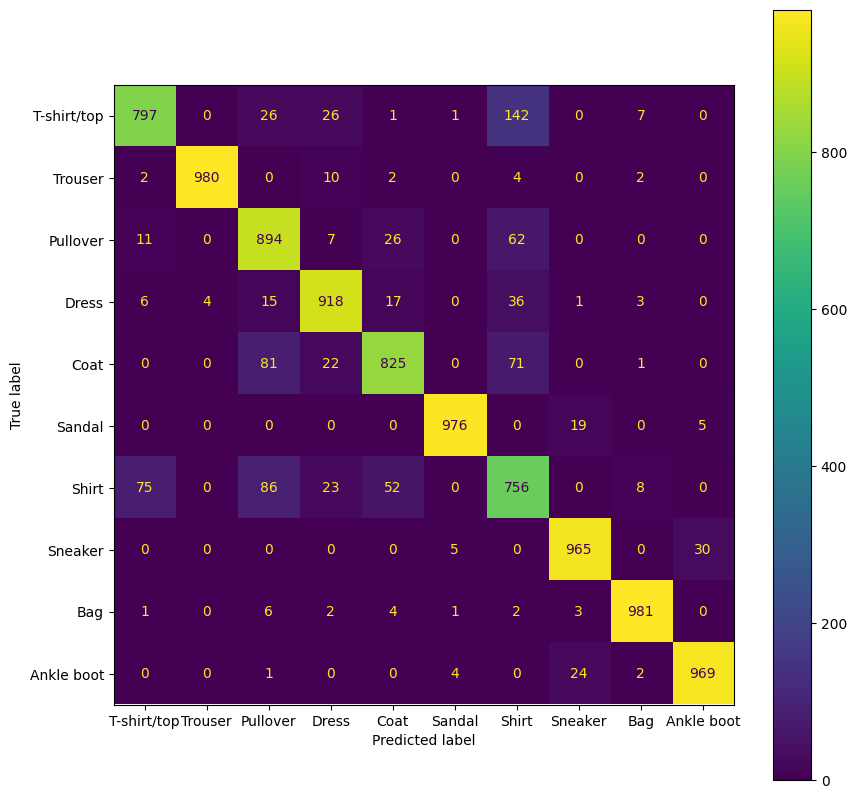

In [ ]:
# crea una figura (fig) y un eje (ax) para el gráfico, con un tamaño de 10×10 pulgadas
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

BONUS:
Codigo para graficar una imagen con su etiqueta predicha

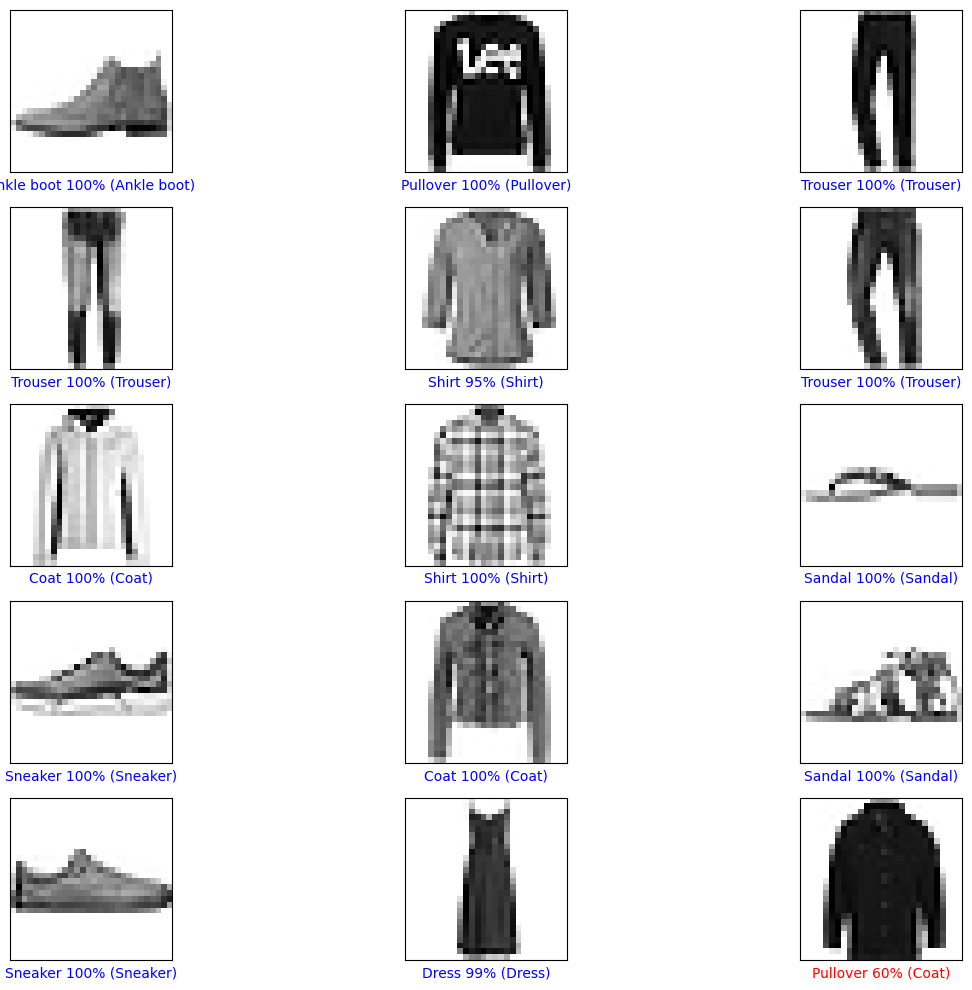

In [ ]:
# este código genera una galería de predicciones del modelo donde cada imagen tiene su nombre predicho y real ademas del color azul indica una predicción correcta

El color rojo indica una predicción incorrecta.
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()

Clasificación de **dígitos**

In [1]:
# importa la función load_digits() del módulo sklearn.datasets, que sirve para cargar un dataset de imágenes de dígitos escritos a mano (0 al 9)
from sklearn.datasets import load_digits

digits = load_digits()


exploracion de dataset

In [2]:
# se muestra las claves (keys) del objeto digits, que es un tipo especial de diccionario de scikit-learn llamado Bunch.
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# se confirma que digits es un paquete completo de datos, etiquetas, metadatos y descripción, listo para usarse en tareas de clasificación o visualización
dict_keys([
    'data', 'target', 'frame',
    'feature_names', 'target_names', 'images',
    'DESCR'
])


llave DESCR

In [4]:
# muestra en pantalla la descripción completa del conjunto de datos “Digits” incluido en scikit-learn
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

VISUALISACION DE IMAGEN

In [5]:
# asigna el valor 0 a la variable index
index = 0


In [6]:
# image contiene los valores de intensidad de píxeles de la primera imagen de un dígito manuscrito ,label es el dígito real que representa esa imagen
image = digits.images[index]
label = digits.target[index]


In [7]:
# se imprime en consola el array de 8×8 valores que representa la primera imagen del dataset digits
print(image)


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


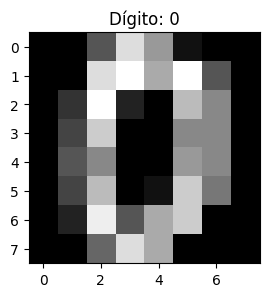

In [8]:
# este código permite visualizar el primer dígito del dataset de manera intuitiva, mostrando la imagen en escala de grises y el número que representa
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Dígito: {label}')
plt.show()


PROCESAMIENTO DE DATOS

In [ ]:
# deja los datos listos para entrenar una red neuronal

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [11]:
# Muestra las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


In [12]:
# estas líneas convierten el vector de 64 píxeles de la primera imagen de entrenamiento en una matriz 8×8, que representa la forma original de la imagen.
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [13]:
# la normalización con StandardScaler hace que los datos tengan media 0 y desviación 1,
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# reshaped_tensor ahora es una representación visual clara de la imagen 8×8, aunque con los valores ya normalizados y redondeados para facilitar la lectura y es útil para inspección o debugging antes de graficar la imagen
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [15]:
# Este paso convierte los datos de vectores a imágenes 2D ,es un preprocesamiento estándar para modelos que requieren entrada con forma (altura, ancho) por imagen, como Conv2D en TensorFlow/Keras
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

RED NEURONAL CONVOLUCIONAL

In [17]:
# Este modelo CNN ,extrae características locales con Conv2D y MaxPooling2D , combina esas características en un vector con Flatten y Predice la clase final (0–9) con capas densas y softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILACION DEL MODELO

In [18]:
# dam es un optimizador muy usado porque converge rápido y de forma estable conn esto, tu modelo CNN estará listo para ser compilado y entrenado usando este optimizado
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [20]:
# con model.compile ,el modelo sabe cómo medir su error (loss) sabe cómo ajustar sus pesos (optimizer)  y sabe qué métricas mostrar (accuracy)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ENTRENAMIENTO DEL MODULO

In [22]:
# el modelo aprende a clasificar los dígitos ajustando sus pesos ademas la validación permite detectar sobreajuste si la pérdida de validación deja de mejorar y history puede usarse después para graficar el progreso del entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4575 - loss: 1.9512 - val_accuracy: 0.8403 - val_loss: 0.9065
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.6735 - val_accuracy: 0.8924 - val_loss: 0.3891
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.2559 - val_accuracy: 0.9410 - val_loss: 0.2690
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9611 - loss: 0.1621 - val_accuracy: 0.9444 - val_loss: 0.2367
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.1302 - val_accuracy: 0.9653 - val_loss: 0.2039
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9770 - loss: 0.0897 - val_accuracy: 0.9583 - val_loss: 0.1769
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9901 - loss: 0.0666 - val_accuracy: 0.9514 - val_loss: 0.1619
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.0503 - val_accuracy: 0.9618 - val_loss

FUNCION DE PERDIDA

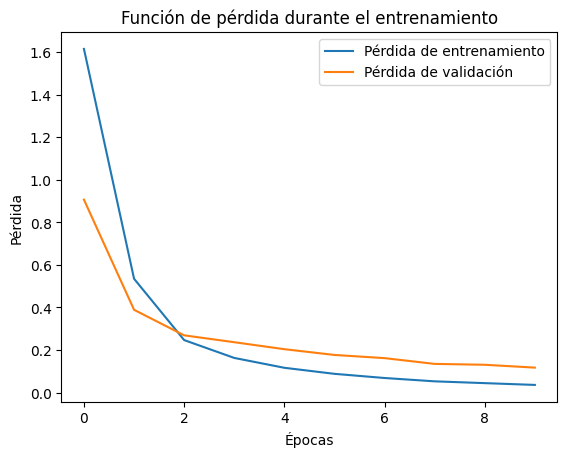

In [23]:
# la gráfica permite ver si el modelo está aprendiendo y detectar posibles problemas de sobreajuste o subajuste
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [ ]:
EVALUACION

In [24]:
# mide qué tan bien la CNN generaliza a datos no vistos
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9818 - loss: 0.0692
Loss: 0.07113529741764069, Accuracy: 0.980555534362793


MATRIZ DE CONFUCION Y SENCIBILIDAD

In [25]:
# se obtiene una evaluación detallada de desempeño por clase del modelo
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


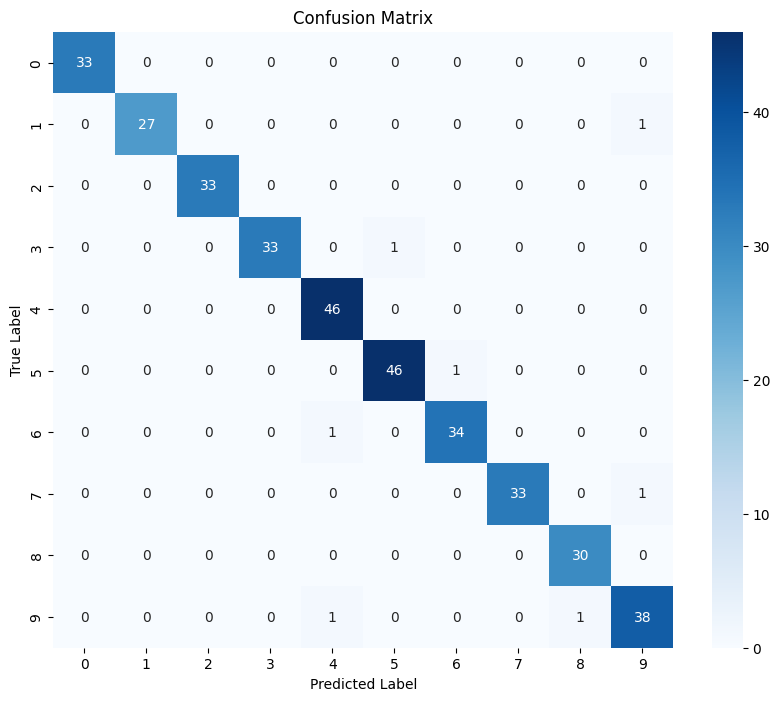

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 1.0
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.95


In [26]:
# permite analizar visual y cuantitativamente dónde el modelo acierta y dónde falla
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

In [ ]:
# permite visualizar cualquier imagen de dígito antes de procesarla para predicción
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


DIMENCIONAR

In [ ]:
# prepara cualquier imagen externa para que pueda ser usada como entrada en la CNN
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


PROCESAMIENTO

In [ ]:
# se  prepara la imagen para que la CNN pueda predecir correctamente el dígito
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [ ]:
#  convierte la imagen externa en un tensor listo para la predicción de la CNN
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

EVALUACION

In [ ]:
# predice qué número representa la imagen externa procesada
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)